<span style="font-size:1.5em;"><b>Task A: Basic Visualizations with Matplotlib</b></span>

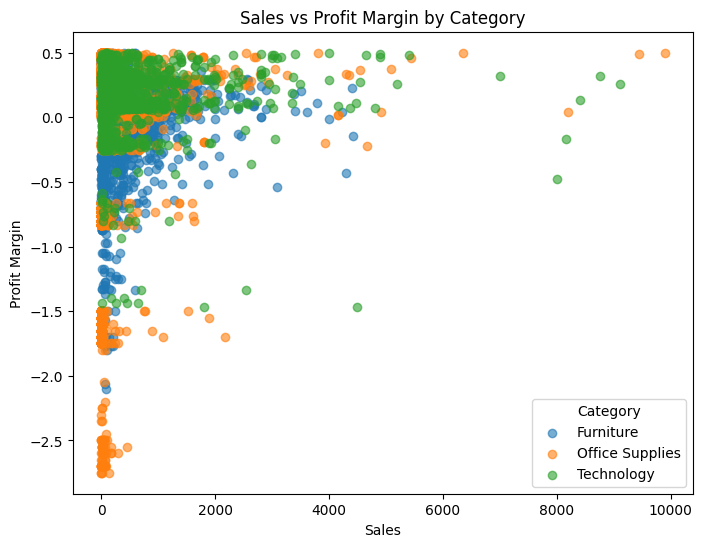

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

superstore = pd.read_csv('../Sample-Superstore.csv', encoding='latin1')

cols = ['Sales', 'Profit', 'Discount', 'Quantity', 'Category', 'Sub-Category', 'Segment', 'Region', 'Ship Mode']
data = superstore[cols].copy()

data['Profit Margin'] = data.apply(lambda row: row['Profit'] / row['Sales'] if row['Sales'] != 0 else 0, axis=1)

filtered_data = data[data['Sales'] <= 10000]

plt.figure(figsize=(8,6))
for category in filtered_data['Category'].unique():
    subset = filtered_data[filtered_data['Category'] == category]
    plt.scatter(subset['Sales'], subset['Profit Margin'], label=category, alpha=0.6)
plt.xlabel('Sales')
plt.ylabel('Profit Margin')
plt.title('Sales vs Profit Margin by Category')
plt.legend(title='Category')
plt.show()


<span style="font-size:1.5em;"><b>Task B: Histogram</b></span>

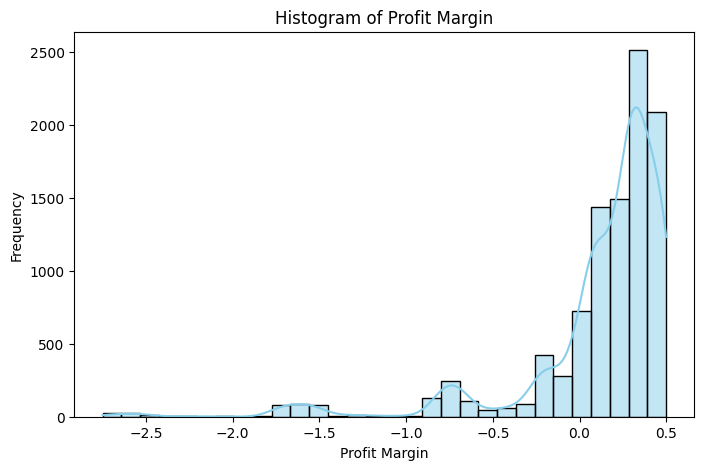

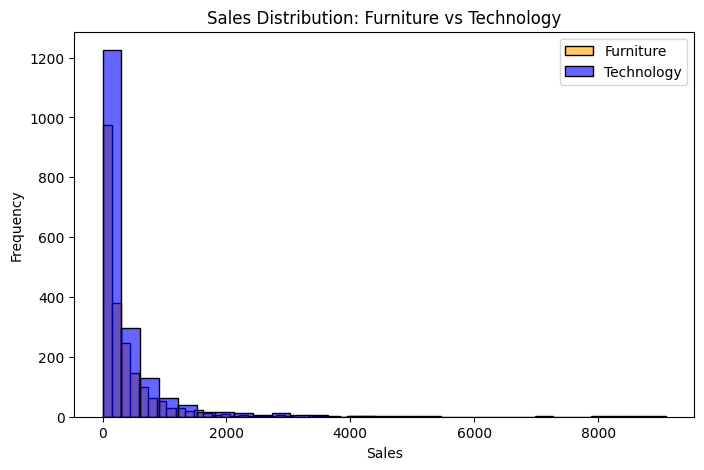

In [3]:
import seaborn as sns
plt.figure(figsize=(8,5))
sns.histplot(filtered_data['Profit Margin'], bins=30, kde=True, color='skyblue')
plt.xlabel('Profit Margin')
plt.ylabel('Frequency')
plt.title('Histogram of Profit Margin')
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(filtered_data[filtered_data['Category']=='Furniture']['Sales'], bins=30, color='orange', label='Furniture', alpha=0.6)
sns.histplot(filtered_data[filtered_data['Category']=='Technology']['Sales'], bins=30, color='blue', label='Technology', alpha=0.6)
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Sales Distribution: Furniture vs Technology')
plt.legend()
plt.show()

<span style="font-size:1.5em;"><b>Task C: Scatter Plot Creation</b></span>

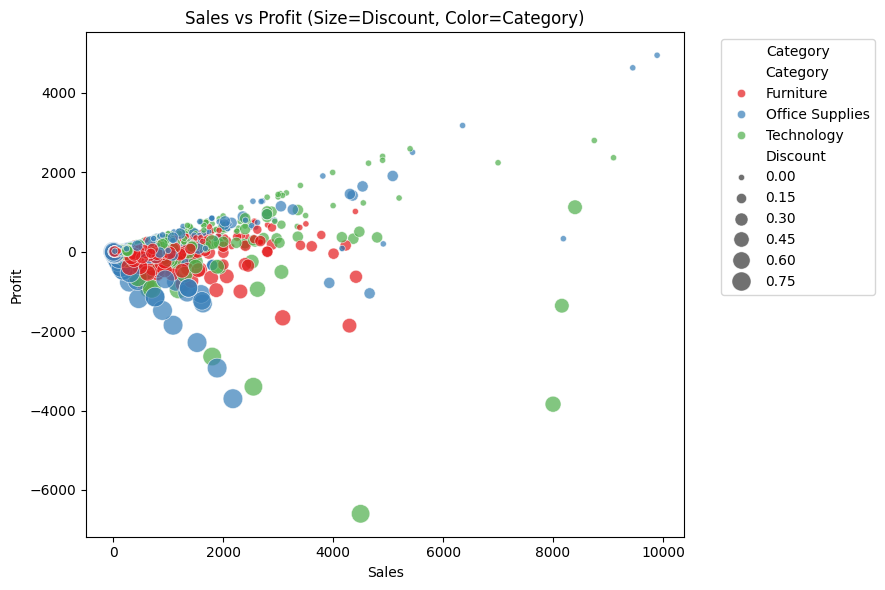

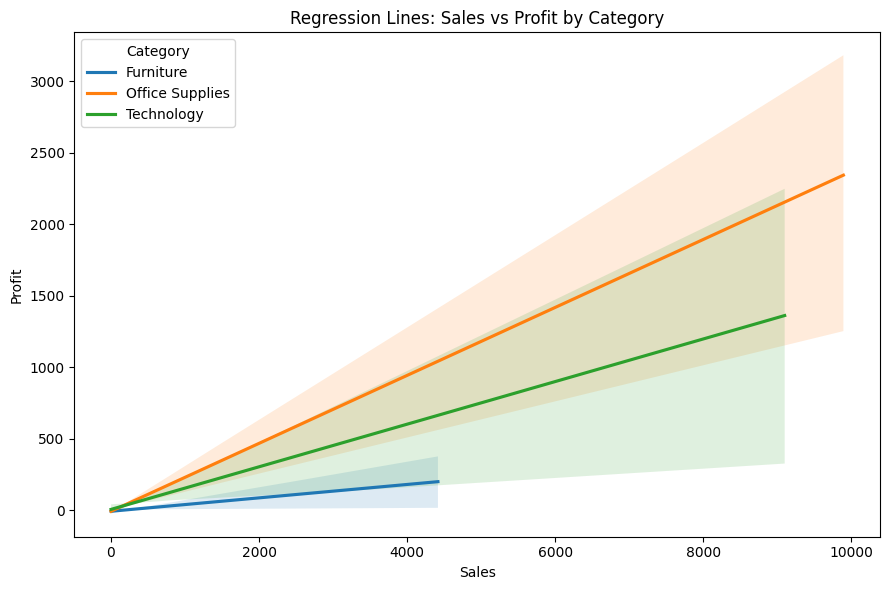

In [4]:
plt.figure(figsize=(9,6))
sns.scatterplot(data=filtered_data, x='Sales', y='Profit', size='Discount', hue='Category', alpha=0.7, sizes=(20, 200), palette='Set1', edgecolor='w', linewidth=0.5)
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.title('Sales vs Profit (Size=Discount, Color=Category)')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

plt.figure(figsize=(9,6))
for category in filtered_data['Category'].unique():
    subset = filtered_data[filtered_data['Category'] == category]
    sns.regplot(x='Sales', y='Profit', data=subset, scatter=False, label=category)
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.title('Regression Lines: Sales vs Profit by Category')
plt.legend(title='Category')
plt.tight_layout()
plt.show()